#Libraries

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import torch
import torch.nn as nn
from transformers import BertModel, BertTokenizer
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import tqdm

In [ ]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

#Bert

In [ ]:
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

#Dataset

In [ ]:
# Load the dataset
#df = pd.read_excel("/content/drive/MyDrive/Precision Drilling/Dataset for Impact Study.xlsx")
df = pd.read_excel('/content/drive/MyDrive/Precision Drilling/Dataset Completed.xlsx')
df.head()

,What is your overall rating of the instructors?,How do you rate the instructor's ability in keeping the session alive and interesting?,How do you rate the instructor's ability to communicate?,How do you rate the instructor's prepardness?,How do you rate the instructor's ability to maintain a friendly and helpful attitude?,How do you rate the relevance of the course materials?,How do you rate the schedule?,How do you rate the presentation of the material?,How do you rate the balance between presentation and group involvement?,How do you rate the effectiveness of the audiovisual aids?,...,Human Resources and/or my manager and I discussed my goals from attending this course,I will use __% of this content on the job,My job performance will improve because of this training experience,I would attribute __% of my expected improvement to this training,How likely are you to recommend this training?,What about it was most valuable to you?,How can we make it more valuable?,Provide and example of how you plan to apply this content on the job,Potential challenges that I expect will prevent me from applying this content include: (check all that apply),I expect this learning experience will positively impact: (check all that apply)
0,5.0,6.0,6.0,6.0,7.0,6.0,7.0,6.0,6.0,6.0,...,6.8170,9.86,6.4741,9.3932,9.7400,\n\nEverything was very\n?\nNothing\nDid the c...,\nIs this information valuable to me \nYes\nWh...,\nKeep the class engaged and sharing knowledge...,\nI do not expect any challenges;\nI do not ex...,Make sure we understand everything for when we...
1,7.0,7.0,7.0,7.0,7.0,7.0,5.0,7.0,7.0,7.0,...,6.8248,9.06,6.7654,9.3700,9.6211,\n\nEverything was great \n\nMore individual i...,\nIs this information valuable to me \nYes\nWh...,\nMore individual involvement\nMore hands on E...,\nUse of the correct tools and how to use the ...,Use of the correct tools when working\nFor gia...
2,6.0,6.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,7.0,...,6.9664,9.89,6.7300,9.6100,9.9774,\n\nEverything was\n\nMore individual involvem...,\nIs this information valuable to me \nYes\nWh...,\nEmployee safetly people that understand the ...,\nLearning about more about the stuff rigging ...,Making sure all work permits are done and prop...
3,6.0,6.0,7.0,6.0,7.0,6.0,6.0,6.0,6.0,6.0,...,6.8782,9.91,6.4227,9.0560,9.7500,\nEverything was\n?\nNothing\nDid the course d...,\nIs this information valuable to me \nYes\nWh...,\nProvide and example of how you plan to apply...,\nKnowing what to do in a rescue situation \nW...,Show others what I learned and use it in the f...
4,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.9892,9.68,6.5051,9.5700,9.7388,\n\nEverything was very valuable\nWhat was you...,\nIs this information valuable to me \nYes\nWh...,\nProvide a basic understanding of novos\nI pl...,\nKnowing what to do in a rescue situation \nW...,Make sure we can hear\nAudio was shotty at bes...


#5 Pointer Conversion

In [ ]:
df.columns

Index(['What is your overall rating of the instructors?',
       'How do you rate the instructor's ability in keeping the session alive and interesting?',
       'How do you rate the instructor's ability to communicate?',
       'How do you rate the instructor's prepardness?',
       'How do you rate the instructor's ability to maintain a friendly and helpful attitude?',
       'How do you rate the relevance of the course materials?',
       'How do you rate the schedule?',
       'How do you rate the presentation of the material?',
       'How do you rate the balance between presentation and group involvement?',
       'How do you rate the effectiveness of the audiovisual aids?',
       'How do you rate the tools that were provided to you?',
       'Comments about tools for instructor',
       ' What would you recommend to improve the course to make it more effective?',
       'Comments of aids for the instructor',
       'Comments about balance and group involvement for instructor',


In [ ]:
n_col = ['What is your overall rating of the instructors?',
       "How do you rate the instructor's ability in keeping the session alive and interesting?",
       "How do you rate the instructor's ability to communicate?",
       "How do you rate the instructor's prepardness?",
       "How do you rate the instructor's ability to maintain a friendly and helpful attitude?",
       'How do you rate the relevance of the course materials?',
       'How do you rate the schedule?',
       'How do you rate the presentation of the material?',
       'How do you rate the balance between presentation and group involvement?',
       'How do you rate the effectiveness of the audiovisual aids?',
       'How do you rate the tools that were provided to you?',
       'I gained new knowledge and skills',
       'This learning experience was a worthwhile investment of my time',
       'The instructor kept me engaged',
       'The instructor helped me understand how to apply the material',
       'The content was relevant to my job',
       'The content is critical to my job',
       'The examples and activities in the course helped me learn',
       'The content was engaging',
       'The content was applicable to __% of my job',
       'I will apply what I learned to my job',
       'Human Resources and/or my manager and I discussed my goals from attending this course',
       'I will use __% of this content on the job',
       'My job performance will improve because of this training experience',
       'I would attribute __% of my expected improvement to this training']

In [ ]:
#Expect drilling and pd exp and Recommendation
def conv(x):
  if x>6.7:
    return 5
  elif x<=6.7 and x>=5:
    return 4
  elif x<5 and x>=4:
    return 3
  elif x<4 and x>=3:
    return 2
  else:
    return 1

for i in n_col:
  df[i] = df[i].apply(lambda x : conv(x))

In [ ]:
df.head()

,What is your overall rating of the instructors?,How do you rate the instructor's ability in keeping the session alive and interesting?,How do you rate the instructor's ability to communicate?,How do you rate the instructor's prepardness?,How do you rate the instructor's ability to maintain a friendly and helpful attitude?,How do you rate the relevance of the course materials?,How do you rate the schedule?,How do you rate the presentation of the material?,How do you rate the balance between presentation and group involvement?,How do you rate the effectiveness of the audiovisual aids?,...,Human Resources and/or my manager and I discussed my goals from attending this course,I will use __% of this content on the job,My job performance will improve because of this training experience,I would attribute __% of my expected improvement to this training,How likely are you to recommend this training?,What about it was most valuable to you?,How can we make it more valuable?,Provide and example of how you plan to apply this content on the job,Potential challenges that I expect will prevent me from applying this content include: (check all that apply),I expect this learning experience will positively impact: (check all that apply)
0,4,4,4,4,5,4,5,4,4,4,...,5,5,4,5,9.7400,\n\nEverything was very\n?\nNothing\nDid the c...,\nIs this information valuable to me \nYes\nWh...,\nKeep the class engaged and sharing knowledge...,\nI do not expect any challenges;\nI do not ex...,Make sure we understand everything for when we...
1,5,5,5,5,5,5,4,5,5,5,...,5,5,5,5,9.6211,\n\nEverything was great \n\nMore individual i...,\nIs this information valuable to me \nYes\nWh...,\nMore individual involvement\nMore hands on E...,\nUse of the correct tools and how to use the ...,Use of the correct tools when working\nFor gia...
2,4,4,4,5,5,4,5,5,5,5,...,5,5,5,5,9.9774,\n\nEverything was\n\nMore individual involvem...,\nIs this information valuable to me \nYes\nWh...,\nEmployee safetly people that understand the ...,\nLearning about more about the stuff rigging ...,Making sure all work permits are done and prop...
3,4,4,5,4,5,4,4,4,4,4,...,5,5,4,5,9.7500,\nEverything was\n?\nNothing\nDid the course d...,\nIs this information valuable to me \nYes\nWh...,\nProvide and example of how you plan to apply...,\nKnowing what to do in a rescue situation \nW...,Show others what I learned and use it in the f...
4,5,5,5,5,5,5,5,5,5,5,...,5,5,4,5,9.7388,\n\nEverything was very valuable\nWhat was you...,\nIs this information valuable to me \nYes\nWh...,\nProvide a basic understanding of novos\nI pl...,\nKnowing what to do in a rescue situation \nW...,Make sure we can hear\nAudio was shotty at bes...


In [ ]:
#Converting for Recommendation
def recommend(x):
  if x>9.8:
    return 5
  elif x<=9.8 and x>9:
    return 4
  elif x<=9 and x>8:
    return 3
  elif x<=8 and x>7:
    return 2
  else:
    return 1

df['How likely are you to recommend this training?'] = df['How likely are you to recommend this training?'].apply(lambda x : recommend(x))

#Feature Engineering

In [ ]:
# Separate the textual and numerical features
text_columns = ['Comments about tools for instructor',
       ' What would you recommend to improve the course to make it more effective?',
       'Comments of aids for the instructor',
       'Comments about balance and group involvement for instructor',
       'Comments for Instructor from question #5?',
       'Comments for Relevance of the course materials for instructor',
       'Comments about schedule for instructor',
       'Comments of presentation of material for instructor',
       'What about it was most valuable to you?',
       'How can we make it more valuable?',
       'Provide and example of how you plan to apply this content on the job',
       'Potential challenges that I expect will prevent me from applying this content include: (check all that apply)',
       'I expect this learning experience will positively impact: (check all that apply)']
numerical_columns = ['What is your overall rating of the instructors?',
     "How do you rate the instructor's ability in keeping the session alive and interesting?",
      "How do you rate the instructor's ability to communicate?",
      "How do you rate the instructor's prepardness?",
      "How do you rate the instructor's ability to maintain a friendly and helpful attitude?",
      'How do you rate the relevance of the course materials?',
      'How do you rate the schedule?',
      'How do you rate the presentation of the material?',
      'How do you rate the balance between presentation and group involvement?',
      'How do you rate the effectiveness of the audiovisual aids?',
      'How do you rate the tools that were provided to you?',
      'Experience with Precision Drilling',
      'Experience in the drilling industry',
      'I gained new knowledge and skills',
      'This learning experience was a worthwhile investment of my time',
      'The instructor kept me engaged',
      'The instructor helped me understand how to apply the material',
      'The content was relevant to my job',
      'The content is critical to my job',
      'The examples and activities in the course helped me learn',
      'The content was engaging',
      'The content was applicable to __% of my job',
      'I will apply what I learned to my job',
      'Human Resources and/or my manager and I discussed my goals from attending this course',
      'I will use __% of this content on the job',
      'My job performance will improve because of this training experience',
      'I would attribute __% of my expected improvement to this training',
      'How likely are you to recommend this training?']

In [ ]:
numerical_columns_1 = ['What is your overall rating of the instructors?',
      "How do you rate the instructor's prepardness?",
      "How do you rate the instructor's ability to maintain a friendly and helpful attitude?",
      'How do you rate the relevance of the course materials?',
      'How do you rate the schedule?',
      'How do you rate the presentation of the material?',
      'How do you rate the balance between presentation and group involvement?',
      'How do you rate the effectiveness of the audiovisual aids?',
      'How do you rate the tools that were provided to you?',
      'Experience with Precision Drilling',
      'Experience in the drilling industry',
      'This learning experience was a worthwhile investment of my time',
      'The instructor kept me engaged',
      'The instructor helped me understand how to apply the material',
      'The content was relevant to my job',
      'The content is critical to my job',
      'The examples and activities in the course helped me learn',
      'The content was engaging',
      'I will apply what I learned to my job',
      'Human Resources and/or my manager and I discussed my goals from attending this course',
      'My job performance will improve because of this training experience',
      'I would attribute __% of my expected improvement to this training',
      'How likely are you to recommend this training?']

In [ ]:
text_columns = df[text_columns]

##Label: Poor, Fair, Good, V Good, Excellent

In [ ]:
# weights = {
#     'session_interest_rating': 0.1,
#     'communication_rating': 0.05,
#     'knowledge_and_skills_rating': 0.05,
#     'applicable_percentage': 0.4,
#     'usage_percentage': 0.35
# }

In [ ]:
weights = {
    'session_interest_rating': 0.2,
    'communication_rating': 0.2,
    'knowledge_and_skills_rating': 0.2,
    'applicable_percentage': 0.2,
    'usage_percentage': 0.2
}

In [ ]:
num_df = df[numerical_columns]

In [ ]:
num_df['combined_rating'] = (
    num_df["How do you rate the instructor's ability in keeping the session alive and interesting?"] * weights['session_interest_rating'] +
    num_df["How do you rate the instructor's ability to communicate?"] * weights['communication_rating'] +
    num_df['I gained new knowledge and skills'] * weights['knowledge_and_skills_rating'] +
    num_df['The content was applicable to __% of my job'] * weights['applicable_percentage'] +
    num_df['I will use __% of this content on the job'] * weights['usage_percentage']
)

<ipython-input-16-64fb1c881994>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['combined_rating'] = (


In [ ]:
num_df["combined_rating"].value_counts()

4.8    545
5.0    381
4.6    156
4.4     50
4.2     13
4.0      5
3.6      2
3.2      1
3.8      1
Name: combined_rating, dtype: int64

In [ ]:
# # #y_pred = num_df["combined_rating"]
# c1=c2=c3=c4=c5=0
# # l = []
# # for i in range(len(y_pred)):
# #   if y_pred[i]>=4.65:
# #     l.append(5)
# #     c1+=1
# #   elif y_pred[i]<4.65 and y_pred[i]>=4.1:
# #     l.append(4)
# #     c2+=1
# #   elif y_pred[i]<4.1 and y_pred[i]>=3.1:
# #     l.append(3)
# #     c3+=1
# #   elif y_pred[i]<3.1 and y_pred[i]>=2.1:
# #     l.append(2)
# #     c4+=1
# #   elif y_pred[i]<2.1:
# #     l.append(1)
# #     c5+=1

# def discrete(x):
#   if x>=4.8:
#     return 5
#     c1+=1
#   elif x<4.8 and x>=4.5:
#     return(4)
#     c2+=1
#   elif x<4.7 and x>=4.6:
#     return 3
#     c3+=1
#   elif x<4.6 and x>=4.3:
#     return 2
#     c4+=1
#   else:
#     return 1
#     c5+=1

# num_df["labels"] = num_df["combined_rating"].apply(lambda x:discrete(x))

In [ ]:
c1=c2=c3=c4=c5=0
def discrete(x):
  if x>=4.8:
    return 1
    c1+=1
  elif x<4.8 and x>4.0:
    return(0)
    c2+=1
  else:
    return -1
    c3+=1

num_df["labels"] = num_df["combined_rating"].apply(lambda x:discrete(x))

<ipython-input-19-7255cf89762f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df["labels"] = num_df["combined_rating"].apply(lambda x:discrete(x))


In [ ]:
num_df["labels"].value_counts()

 1    926
 0    219
-1      9
Name: labels, dtype: int64

In [ ]:
num_df.head()

,What is your overall rating of the instructors?,How do you rate the instructor's ability in keeping the session alive and interesting?,How do you rate the instructor's ability to communicate?,How do you rate the instructor's prepardness?,How do you rate the instructor's ability to maintain a friendly and helpful attitude?,How do you rate the relevance of the course materials?,How do you rate the schedule?,How do you rate the presentation of the material?,How do you rate the balance between presentation and group involvement?,How do you rate the effectiveness of the audiovisual aids?,...,The content was engaging,The content was applicable to __% of my job,I will apply what I learned to my job,Human Resources and/or my manager and I discussed my goals from attending this course,I will use __% of this content on the job,My job performance will improve because of this training experience,I would attribute __% of my expected improvement to this training,How likely are you to recommend this training?,combined_rating,labels
0,4,4,4,4,5,4,5,4,4,4,...,4,5,5,5,5,4,5,4,4.4,0
1,5,5,5,5,5,5,4,5,5,5,...,5,5,5,5,5,5,5,4,4.8,1
2,4,4,4,5,5,4,5,5,5,5,...,5,5,5,5,5,5,5,5,4.4,0
3,4,4,5,4,5,4,4,4,4,4,...,4,5,5,5,5,4,5,4,4.6,0
4,5,5,5,5,5,5,5,5,5,5,...,4,5,4,5,5,4,5,4,4.8,1


##Creating new numerical features
1. 'What is your overall rating of the instructors?',

1.  "How do you rate the instructor's prepardness?",

1.  "How do you rate the instructor's ability to maintain a friendly and helpful attitude?",

2.  'How do you rate the relevance of the course materials?',

1.  'How do you rate the schedule?',

2.  'How do you rate the presentation of the material?',

2.  'How do you rate the balance between presentation and group involvement?',

2.  'How do you rate the effectiveness of the audiovisual aids?',

2.  'How do you rate the tools that were provided to you?',

4.  'Experience with Precision Drilling',

4. 'Experience in the drilling industry',

4. 'This learning experience was a worthwhile investment of my time',

1.  'The instructor kept me engaged',

1.   'The instructor helped me understand how to apply the material',

4.  'The content was relevant to my job',

4.   'The content is critical to my job',

4.  'The examples and activities in the course helped me learn',

4.  'The content was engaging',

4.   'I will apply what I learned to my job',

1.   'Human Resources and/or my manager and I discussed my goals from attending this course',

4.  'My job performance will improve because of this training experience',

4.  'I would attribute __% of my expected improvement to this training',

4.  'How likely are you to recommend this training?'

###Instructor, Course,

In [ ]:
#Instructors
w1 = {
    "Overall Rating":0.3,
    "Preparedness":0.15,
    "Friendly & Helpful attitude":0.1,
    "Schedule":0.1,
    "Engaged":0.15,
    "Apply Material":0.15,
    "Human Resource":0.05
}

#Course
w2 = {
    "Relevance CW":0.3,
    "Presentation":0.2,
    "Group":0.1,
    "Audiovisual":0.2,
    "Tools":0.2
}

#Work involvement
w3 = {
    "PD exp":0.05,
    "Drilling exp":0.3,
    "Worth Investment":0.05,
    "Relevant to Job":0.1,
    "Critical to Job":0.1,
    "Course activites":0.02,
    "Engaging Content":0.03,
    "Imply to Job":0.05,
    "Improve performance":0.07,
    "Improvement in training":0.1,
    "Recommend training":0.13
}

In [ ]:
#Instructors
w1 = {
    "Overall Rating":0.16,
    "Preparedness":0.14,
    "Friendly & Helpful attitude":0.14,
    "Schedule":0.14,
    "Engaged":0.14,
    "Apply Material":0.14,
    "Human Resource":0.14
}

#Course
w2 = {
    "Relevance CW":0.2,
    "Presentation":0.2,
    "Group":0.2,
    "Audiovisual":0.2,
    "Tools":0.2
}

#Work involvement
w3 = {
    "PD exp":0.09,
    "Drilling exp":0.09,
    "Worth Investment":0.09,
    "Relevant to Job":0.09,
    "Critical to Job":0.09,
    "Course activites":0.09,
    "Engaging Content":0.09,
    "Imply to Job":0.09,
    "Improve performance":0.09,
    "Improvement in training":0.09,
    "Recommend training":0.1
}

In [ ]:
num_df['Instructor_rating'] = (
    num_df['What is your overall rating of the instructors?'] * w1['Overall Rating'] +
    num_df["How do you rate the instructor's prepardness?"] * w1['Preparedness'] +
    num_df["How do you rate the instructor's ability to maintain a friendly and helpful attitude?"] * w1["Friendly & Helpful attitude"] +
    num_df['How do you rate the schedule?'] * w1['Schedule'] +
    num_df['The instructor kept me engaged'] * w1['Engaged'] +
    num_df['The instructor helped me understand how to apply the material'] * w1['Apply Material'] +
    num_df['Human Resources and/or my manager and I discussed my goals from attending this course'] * w1['Human Resource']
)

<ipython-input-53-b2b84d6f368f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['Instructor_rating'] = (


In [ ]:
num_df['course_rating'] = (
    num_df["How do you rate the relevance of the course materials?"] * w2['Relevance CW'] +
    num_df['How do you rate the presentation of the material?'] * w2['Presentation'] +
    num_df['How do you rate the balance between presentation and group involvement?'] * w2['Group'] +
    num_df['How do you rate the effectiveness of the audiovisual aids?'] * w2['Audiovisual'] +
    num_df['How do you rate the tools that were provided to you?'] * w2['Tools']
)

<ipython-input-54-e933b875e8bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['course_rating'] = (


In [ ]:
num_df['Work_rating'] = (
    num_df['Experience with Precision Drilling'] * w3['PD exp'] +
    num_df['Experience in the drilling industry'] * w3['Drilling exp'] +
    num_df['This learning experience was a worthwhile investment of my time'] * w3['Worth Investment'] +
    num_df['The content was relevant to my job'] * w3['Relevant to Job'] +
    num_df['The content is critical to my job'] * w3['Course activites']+
    num_df['The examples and activities in the course helped me learn'] * w3['Course activites'] +
    num_df['The content was engaging'] * w3['Engaging Content']+
    num_df['I will apply what I learned to my job'] * w3['Imply to Job'] +
    num_df['My job performance will improve because of this training experience'] * w3['Improve performance']+
    num_df['I would attribute __% of my expected improvement to this training'] * w3['Improvement in training'] +
    num_df['How likely are you to recommend this training?'] * w3["Recommend training"]


)

<ipython-input-55-4e36c88947a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['Work_rating'] = (


In [ ]:
num_df["Work_rating"].value_counts()

4.190000    28
4.280000    28
4.955000    19
4.820000    12
4.550000    11
            ..
3.790000     1
4.775000     1
4.415000     1
1.580000     1
4.800157     1
Name: Work_rating, Length: 980, dtype: int64

In [ ]:
num_df.head()

,What is your overall rating of the instructors?,How do you rate the instructor's ability in keeping the session alive and interesting?,How do you rate the instructor's ability to communicate?,How do you rate the instructor's prepardness?,How do you rate the instructor's ability to maintain a friendly and helpful attitude?,How do you rate the relevance of the course materials?,How do you rate the schedule?,How do you rate the presentation of the material?,How do you rate the balance between presentation and group involvement?,How do you rate the effectiveness of the audiovisual aids?,...,Human Resources and/or my manager and I discussed my goals from attending this course,I will use __% of this content on the job,My job performance will improve because of this training experience,I would attribute __% of my expected improvement to this training,How likely are you to recommend this training?,combined_rating,labels,Instructor_rating,course_rating,Work_rating
0,4,4,4,4,5,4,5,4,4,4,...,5,5,4,5,4,4.4,2,4.56,4.0,4.50969
1,5,5,5,5,5,5,4,5,5,5,...,5,5,5,5,4,4.8,4,4.86,5.0,4.59265
2,4,4,4,5,5,4,5,5,5,5,...,5,5,5,5,5,4.4,2,4.84,4.8,4.54891
3,4,4,5,4,5,4,4,4,4,4,...,5,5,4,5,4,4.6,3,4.56,4.0,4.31140
4,5,5,5,5,5,5,5,5,5,5,...,5,5,4,5,4,4.8,4,4.72,5.0,4.52740


In [ ]:
#New Numerical Features

num_col = [
    "Instructor_rating",
    "course_rating",
    "Work_rating"
]

dataframe = num_df[num_col+["labels"]]
dataframe.head()

,Instructor_rating,course_rating,Work_rating,labels
0,4.56,4.0,4.50969,2
1,4.86,5.0,4.59265,4
2,4.84,4.8,4.54891,2
3,4.56,4.0,4.31140,3
4,4.72,5.0,4.52740,4


#Train and Val

In [ ]:
data = pd.DataFrame()
data["labels"] = num_df["labels"]
data.head()
data["Comments"] = text_columns[text_columns.columns[:]].apply(
    lambda x : ".\n".join(x), axis =1
)
data.head()

,labels,Comments
0,0,Good.\nGood.\nGood.\nWe was involved.\nWas goo...
1,1,More visual aids for BHP when asked questions ...
2,0,\nEveryone was given a chance to speak up abou...
3,0,Tool were good.\nNothing .\nNone.\nGood.\nComm...
4,1,He provides the necessary tools .\nNew more up...


In [ ]:
df = data
df["labels"] = df["labels"]
df.head()

,labels,Comments
0,0,Good.\nGood.\nGood.\nWe was involved.\nWas goo...
1,1,More visual aids for BHP when asked questions ...
2,0,\nEveryone was given a chance to speak up abou...
3,0,Tool were good.\nNothing .\nNone.\nGood.\nComm...
4,1,He provides the necessary tools .\nNew more up...


In [ ]:
df.labels.value_counts()

 1    926
 0    219
-1      9
Name: labels, dtype: int64

In [ ]:
data = num_df[num_col+["labels"]]
data["Comments"] = text_columns[text_columns.columns[:]].apply(
    lambda x : " ".join(x), axis =1
)
data.head()

NameError: ignored

In [ ]:
data = num_df[numerical_columns_1+["labels"]]
data["Comments"] = text_columns[text_columns.columns[:]].apply(
    lambda x : ".\n".join(x), axis =1
)
data.head()

<ipython-input-28-54a6c4ddbf0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Comments"] = text_columns[text_columns.columns[:]].apply(


,What is your overall rating of the instructors?,How do you rate the instructor's prepardness?,How do you rate the instructor's ability to maintain a friendly and helpful attitude?,How do you rate the relevance of the course materials?,How do you rate the schedule?,How do you rate the presentation of the material?,How do you rate the balance between presentation and group involvement?,How do you rate the effectiveness of the audiovisual aids?,How do you rate the tools that were provided to you?,Experience with Precision Drilling,...,The content is critical to my job,The examples and activities in the course helped me learn,The content was engaging,I will apply what I learned to my job,Human Resources and/or my manager and I discussed my goals from attending this course,My job performance will improve because of this training experience,I would attribute __% of my expected improvement to this training,How likely are you to recommend this training?,labels,Comments
0,4,4,5,4,5,4,4,4,4,4.035,...,4,4,4,5,5,4,5,4,0,Good.\nGood.\nGood.\nWe was involved.\nWas goo...
1,5,5,5,5,4,5,5,5,5,3.680,...,4,4,5,5,5,5,5,4,1,More visual aids for BHP when asked questions ...
2,4,5,5,4,5,5,5,5,5,3.555,...,5,4,5,5,5,5,5,5,0,\nEveryone was given a chance to speak up abou...
3,4,4,5,4,4,4,4,4,4,3.730,...,4,4,4,5,5,4,5,4,0,Tool were good.\nNothing .\nNone.\nGood.\nComm...
4,5,5,5,5,5,5,5,5,5,5.135,...,4,4,4,4,5,4,5,4,1,He provides the necessary tools .\nNew more up...


In [ ]:
data.to_excel("New_Transformed_data.xlsx", index=False)

#Extra Viz

In [ ]:
token_lens =[]
for txt in data.Comments:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

<ipython-input-30-a09a938c7e92>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens)


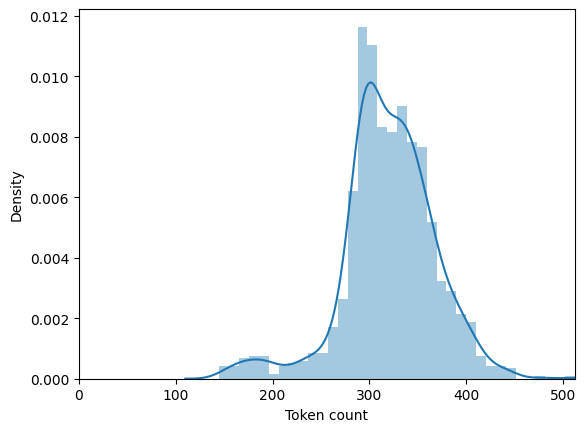

In [ ]:
sns.distplot(token_lens)
plt.xlim([0, 512]);
plt.xlabel('Token count');

In [ ]:
MAX_LEN = 500

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data.index.values,
                                                  data.labels.values,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=data.labels.values)

In [ ]:
data['data_type'] = ['not_set']*data.shape[0]
data.loc[X_train, 'data_type'] = 'train'
data.loc[X_val, 'data_type'] = 'val'

<ipython-input-49-63397172a5da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['data_type'] = ['not_set']*data.shape[0]


In [ ]:
data.head()
data.groupby(['labels', 'data_type']).count()

Instructor_rating  course_rating  Work_rating  Comments
labels data_type                                                         
1      train                      3              3            3         3
       val                        1              1            1         1
2      train                      7              7            7         7
       val                        1              1            1         1
3      train                     24             24           24        24
       val                        6              6            6         6
4      train                    103            103          103       103
       val                       26             26           26        26
5      train                    786            786          786       786
       val                      197            197          197       197

In [ ]:
df["labels"].value_counts()

4    983
3    129
2     30
1      8
0      4
Name: labels, dtype: int64

In [ ]:
data.head()

,labels,Comments
0,5,Good Good Good We was involved Was good Was go...
1,5,More visual aids for BHP when asked questions ...
2,5,\nEveryone was given a chance to speak up abou...
3,5,Tool were good Nothing None Good Communicatio...
4,5,He provides the necessary tools New more up t...


#Bert DBert Way - Works

In [ ]:
import torch
from transformers import BertModel, BertTokenizer
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd

class SentimentDataset(Dataset):
    def __init__(self, data, tokenizer, max_length):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text = str(self.data.iloc[idx]['Comments'])
        label = self.data.iloc[idx]['labels']
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'label': torch.tensor(label, dtype=torch.long)
        }

# Set seed for reproducibility
torch.manual_seed(42)

# Load and preprocess data

train_df, val_df = train_test_split(df, test_size=0.5, random_state=42, stratify= df.labels.values)
val_df, test_df = train_test_split(val_df, test_size=0.5, random_state=42)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_length = 512

train_dataset = SentimentDataset(train_df, tokenizer, max_length)
val_dataset = SentimentDataset(val_df, tokenizer, max_length)
test_dataset = SentimentDataset(test_df, tokenizer, max_length)


In [ ]:
final_old = pd.read_excel("Final_Old.xlsx")
final_new = pd.read_excel("Final New.xlsx")
final_old_test = pd.DataFrame()
final_new_test = pd.DataFrame()
final_old_test["Comments"] = final_old["comments"]
final_new_test["Comments"] = final_new["Comments"]

In [ ]:
final_old_test.head()

,Comments
0,Good.\nGood.\nGood.\nWe was involved.\nWas goo...
1,More visual aids for BHP when asked questions ...
2,\nEveryone was given a chance to speak up abou...
3,Tool were good.\nNothing .\nNone.\nGood.\nComm...
4,He provides the necessary tools .\nNew more up...


In [ ]:
final_old_test = SentimentDataset(final_old_test, tokenizer,max_length)
final_new_test = SentimentDataset(final_new_test, tokenizer,max_length)

In [ ]:
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
final_old_loader = DataLoader(final_old_test, batch_size = batch_size, shuffle = False)
final_new_loader = DataLoader(final_new_test, batch_size = batch_size, shuffle = False)

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
# Define the model
class BertSentimentClassifier(nn.Module):
    def __init__(self, num_labels):
        super(BertSentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = nn.Dropout(0.1)
        self.linear = nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = output[0][:, 0, :]
        output = self.dropout(pooled_output)
        logits = self.linear(output)
        return logits

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_labels = 3
model = BertSentimentClassifier(num_labels).to(device)
# model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=5).to(device)

In [ ]:
# Training hyperparameters
num_epochs = 50
learning_rate = 2e-5
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Training loop
model.train()
for epoch in range(num_epochs):
    train_loss = 0
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        logits = model(input_ids, attention_mask)
        modified_labels = labels + 1

        loss = torch.nn.CrossEntropyLoss(ignore_index=-1)(logits, modified_labels)
        #loss = criterion(logits, labels)

        loss.backward()

        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}")



Epoch 1/50, Train Loss: 0.5491
Epoch 2/50, Train Loss: 0.5382
Epoch 3/50, Train Loss: 0.4898
Epoch 4/50, Train Loss: 0.4521
Epoch 5/50, Train Loss: 0.3804
Epoch 6/50, Train Loss: 0.3089
Epoch 7/50, Train Loss: 0.1898
Epoch 8/50, Train Loss: 0.1328
Epoch 9/50, Train Loss: 0.1324
Epoch 10/50, Train Loss: 0.1163
Epoch 11/50, Train Loss: 0.0355
Epoch 12/50, Train Loss: 0.0221
Epoch 13/50, Train Loss: 0.0366
Epoch 14/50, Train Loss: 0.0540
Epoch 15/50, Train Loss: 0.0509
Epoch 16/50, Train Loss: 0.0223
Epoch 17/50, Train Loss: 0.0549
Epoch 18/50, Train Loss: 0.0219
Epoch 19/50, Train Loss: 0.0039
Epoch 20/50, Train Loss: 0.0021
Epoch 21/50, Train Loss: 0.0017
Epoch 22/50, Train Loss: 0.0020
Epoch 23/50, Train Loss: 0.0052
Epoch 24/50, Train Loss: 0.0012
Epoch 25/50, Train Loss: 0.0010
Epoch 26/50, Train Loss: 0.0008
Epoch 27/50, Train Loss: 0.0008
Epoch 28/50, Train Loss: 0.0008
Epoch 29/50, Train Loss: 0.0007
Epoch 30/50, Train Loss: 0.0006
Epoch 31/50, Train Loss: 0.0005
Epoch 32/50, Trai

In [ ]:
# Evaluation loop : final_old_loader
model.eval()
val_loss = 0
correct_predictions = 0
predicted_labels=[]
with torch.no_grad():
    for batch in final_old_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        #labels = batch['label'].to(device)

        logits = model(input_ids, attention_mask)
        #loss = criterion(logits, labels)
        #val_loss += loss.item()

        predicted_batch_labels = torch.argmax(logits, dim=1).tolist()

        predicted_labels.extend(predicted_batch_labels)


val_loss /= len(val_loader)
val_accuracy = correct_predictions / len(val_df)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


KeyError: ignored

In [ ]:
# Evaluation loop : Valdiation
model.eval()
val_loss = 0
correct_predictions = 0

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        logits = model(input_ids, attention_mask)
        loss = criterion(logits, labels)
        val_loss += loss.item()

        _, predicted_labels = torch.max(logits, dim=1)
        correct_predictions += torch.sum(predicted_labels == labels).item()

val_loss /= len(val_loader)
val_accuracy = correct_predictions / len(val_df)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


RuntimeError: ignored

In [ ]:
# Evaluation loop : Test
model.eval()
test_loss = 0
correct_predictions = 0
final={}

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        logits = model(input_ids, attention_mask)
        loss = criterion(logits, labels)
        test_loss += loss.item()

        _, predicted_labels = torch.max(logits, dim=1)
        correct_predictions += torch.sum(predicted_labels == labels).item()
        final[labels] = predicted_labels

test_loss /= len(test_loader)
test_accuracy = correct_predictions / len(test_df)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 1.7941
Test Accuracy: 0.7889


In [ ]:
(final.keys())

dict_keys([tensor([4, 4, 3, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 2, 4, 4, 4, 4, 3, 4], device='cuda:0'), tensor([4, 4, 4, 3, 4, 3, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 2, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 3, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 3, 4, 4, 4], device='cuda:0'), tensor([4, 4, 3, 4, 4, 4, 4, 4], device='cuda:0'), tensor([3, 4, 4, 3, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 3, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 3, 4, 4, 4, 3, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 3], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 3, 3, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 2, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 3, 4, 3, 4], device='cuda:0'), tensor([3, 4, 4, 4, 4, 4, 3, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 3, 4], device='cuda:0'), tensor([4, 1, 4, 4, 

In [ ]:
final.values()

dict_values([tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4

In [ ]:
# Nothing. It was all helpful
# Do not have classes on weekends
# I thought it was
#  to include more time on training rig to catch us up to speed.
# Nothing. It was ?
# Nothing. It was all helpful
# Do not have classes on weekends
# I
#  to help with focusing on the course content
# Nothing
# Making class a day longer to go outside and run the rig
#   for instructor and students
# More individual involvement
# More hands on Exercises
# I think it was very
#  for instructor
# More individual involvement
# More hands on Exercises
# I think it was very her stick to schedule
# The schedule was very informative
#  for instructor
# More individual involvement
# More hands on Exercises
# I think it was very helpful and
#  for instructor

In [ ]:
final_old_test.head()

y_pred = []
for text in final_old_test["Comments"]:
  encoded_input = tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=512,
    padding='max_length',
    return_tensors='pt')

  input_ids = encoded_input['input_ids'].to(device)
  attention_mask = encoded_input['attention_mask'].to(device)


  # Inference
  model.eval()
  with torch.no_grad():
      logits = model(input_ids, attention_mask)
      predicted_labels = torch.argmax(logits, dim=1).tolist()
      y_pred.extend(predicted_labels)
#print("Predicted Sentiment Labels:", predicted_labels.item())


In [ ]:
#final_old_test.head()

y_pred = []
for text in final_new_test["Comments"]:
  encoded_input = tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=512,
    padding='max_length',
    return_tensors='pt')

  input_ids = encoded_input['input_ids'].to(device)
  attention_mask = encoded_input['attention_mask'].to(device)


  # Inference
  model.eval()
  with torch.no_grad():
      logits = model(input_ids, attention_mask)
      predicted_labels = torch.argmax(logits, dim=1).tolist()
      y_pred.extend(predicted_labels)
#print("Predicted Sentiment Labels:", predicted_labels.item())


In [ ]:
y_pred

In [ ]:
# Example input
text = """Making class a day longer to go outside and run the rig  """
encoded_input = tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=512,
    padding='max_length',
    return_tensors='pt'
)

input_ids = encoded_input['input_ids'].to(device)
attention_mask = encoded_input['attention_mask'].to(device)

y_pred = []
# Inference
model.eval()
with torch.no_grad():
    logits = model(input_ids, attention_mask)
    predicted_labels = torch.argmax(logits, dim=1)
    y_pred.append(predicted_labels)
print("Predicted Sentiment Labels:", predicted_labels.item())


Predicted Sentiment Labels: 3


#DBert - Worked

In [ ]:
df["labels"]=df["labels"]-1

In [ ]:
df.head()

,labels,Comments
0,4,Good Good Good We was involved Was good Was go...
1,4,More visual aids for BHP when asked questions ...
2,4,\nEveryone was given a chance to speak up abou...
3,4,Tool were good Nothing None Good Communicatio...
4,4,He provides the necessary tools New more up t...


In [ ]:
import torch
import torch.nn as nn
from transformers import DistilBertModel, DistilBertTokenizer
from transformers import BertModel, BertTokenizer
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd

class SentimentDataset(Dataset):
    def __init__(self, data, tokenizer, max_length):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text = str(self.data.iloc[idx]['Comments'])
        label = self.data.iloc[idx]['labels']
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'label': torch.tensor(label, dtype=torch.long)
        }

# Set seed for reproducibility
torch.manual_seed(42)

# Load and preprocess data

train_df, val_df = train_test_split(df, test_size=0.5, random_state=42, stratify= df.labels.values)
val_df, test_df = train_test_split(val_df, test_size=0.5, random_state=42)

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
max_length = 500

train_dataset = SentimentDataset(train_df, tokenizer, max_length)
val_dataset = SentimentDataset(val_df, tokenizer, max_length)
test_dataset = SentimentDataset(test_df, tokenizer, max_length)


In [ ]:
batch_size = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Define the model
class DistilBertSentimentClassifier(nn.Module):
    def __init__(self, num_labels):
        super(DistilBertSentimentClassifier, self).__init__()
        self.distilbert = DistilBertModel.from_pretrained('distilbert-base-uncased')
        self.dropout = nn.Dropout(0.1)
        self.linear = nn.Linear(self.distilbert.config.dim, num_labels)

    def forward(self, input_ids, attention_mask):
        output = self.distilbert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = output[0][:, 0, :]
        output = self.dropout(pooled_output)
        logits = self.linear(output)
        return logits

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_labels = 5
model = DistilBertSentimentClassifier(num_labels).to(device)


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Training hyperparameters
num_epochs = 15
learning_rate = 3e-5
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Training loop
model.train()
for epoch in range(num_epochs):
    train_loss = 0
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        logits = model(input_ids, attention_mask)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}")



Epoch 1/15, Train Loss: 0.5376
Epoch 2/15, Train Loss: 0.4810
Epoch 3/15, Train Loss: 0.4620
Epoch 4/15, Train Loss: 0.4448
Epoch 5/15, Train Loss: 0.4159
Epoch 6/15, Train Loss: 0.3507
Epoch 7/15, Train Loss: 0.3054
Epoch 8/15, Train Loss: 0.2148
Epoch 9/15, Train Loss: 0.1433
Epoch 10/15, Train Loss: 0.1349
Epoch 11/15, Train Loss: 0.0550
Epoch 12/15, Train Loss: 0.0262
Epoch 13/15, Train Loss: 0.0694
Epoch 14/15, Train Loss: 0.0142
Epoch 15/15, Train Loss: 0.0051


In [ ]:
# Evaluation loop
model.eval()
val_loss = 0
correct_predictions = 0

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        logits = model(input_ids, attention_mask)
        loss = criterion(logits, labels)
        val_loss += loss.item()

        _, predicted_labels = torch.max(logits, dim=1)
        correct_predictions += torch.sum(predicted_labels == labels).item()

val_loss /= len(val_loader)
val_accuracy = correct_predictions / len(val_df)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Validation Loss: 1.2083
Validation Accuracy: 0.7882


In [ ]:
# Evaluation loop
model.eval()
test_loss = 0
correct_predictions = 0
final={}

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        logits = model(input_ids, attention_mask)
        loss = criterion(logits, labels)
        test_loss += loss.item()

        _, predicted_labels = torch.max(logits, dim=1)
        correct_predictions += torch.sum(predicted_labels == labels).item()
        final[labels] = predicted_labels

test_loss /= len(test_loader)
test_accuracy = correct_predictions / len(test_df)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 1.2306
Test Accuracy: 0.7958


In [ ]:
final.keys(), final.values()

(dict_keys([tensor([4, 4, 4, 4, 4, 4, 1, 4, 3, 4, 1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 2, 4, 2], device='cuda:0'), tensor([4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 2, 2, 3, 4,
         4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 3, 4, 3, 3], device='cuda:0'), tensor([4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 3, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 0, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4,
         4, 4, 2, 4, 4, 4, 3, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 2, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4], device='cuda:0')]),
 dict_values([

In [ ]:
# Example input
# text = " bad bad."
# encoded_input = tokenizer.encode_plus(
#     text,
#     add_special_tokens=True,
#     max_length=512,
#     padding='max_length',
#     return_tensors='pt'
# )

# input_ids = encoded_input['input_ids'].to(device)
# attention_mask = encoded_input['attention_mask'].to(device)

y_pred = []
# Inference
model.eval()
with torch.no_grad():
  for batch in test_loader:
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    logits = model(input_ids, attention_mask)
    predicted_labels = torch.argmax(logits, dim=1)
    y_pred.append(predicted_labels)
# print("Predicted Sentiment Labels:", predicted_labels.item())
print("Predicted Sentiment Labels:", y_pred, "/nActual Labels:",test_df.labels.values)

Predicted Sentiment Labels: [tensor([3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        3, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 3, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 3, 4, 4, 4], device='cuda:0'), tensor([3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 3, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4], device='cuda:0')] /nActu

In [ ]:
y_pred

[tensor([3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'),
 tensor([4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
         3, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'),
 tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 3, 4, 4, 4, 4], device='cuda:0'),
 tensor([4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 3, 4, 4, 4], device='cuda:0'),
 tensor([3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'),
 tensor([4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'),
 tensor([4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 3, 4, 4, 4], device='cuda:0'),
 tensor([4, 4, 4, 4, 4, 4, 4], device='cuda:0')]

In [ ]:
test_df.labels

569     4
611     4
417     4
284     4
1097    4
       ..
500     4
440     4
189     4
720     4
52      4
Name: labels, Length: 231, dtype: int64

#Bert with Numerical Features - Works





In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel, AdamW

# Define the custom dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, numerical_features, labels, tokenizer, max_len):
        self.texts = texts
        self.numerical_features = numerical_features
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        numerical_features = self.numerical_features[idx]
        label = self.labels[idx]

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        input_ids = inputs["input_ids"].squeeze()
        attention_mask = inputs["attention_mask"].squeeze()

        return {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "numerical_features": torch.tensor(numerical_features),
            "label": torch.tensor(label)
        }

In [ ]:
# Set the device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pre-trained BERT model and tokenizer
bert_model = BertModel.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
# data["labels"] = data["labels"]-1
# data.head()

In [ ]:
num_col = numerical_columns_1
len(num_col)

23

In [ ]:
# Load and preprocess the dataset
train, val = train_test_split(data, test_size = 0.5, random_state = 42, stratify = data.labels.values)  # Replace with your dataset file
val, test = train_test_split(val, test_size=0.5, random_state= 42)
#numerical_features = data[num_col].values

# Split the dataset into train and validation sets
train_texts = train["Comments"].values
train_numerical_features = train[num_col].values
train_labels = train["labels"].values
valid_texts = val["Comments"].values
valid_numerical_features = val[num_col].values
valid_labels = val["labels"].values
test_texts = test["Comments"].values
test_numerical_features = test[num_col].values
test_labels = test["labels"].values

# Define the dataset and data loaders
max_len = 512  # Maximum sequence length
batch_size = 8

train_dataset = CustomDataset(train_texts, train_numerical_features, train_labels, tokenizer, max_len)
valid_dataset = CustomDataset(valid_texts, valid_numerical_features, valid_labels, tokenizer, max_len)
test_dataset = CustomDataset(test_texts, test_numerical_features, test_labels, tokenizer, max_len)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset,batch_size=batch_size)



In [ ]:
train_numerical_features.shape
train_labels.shape

(577,)

In [ ]:
# Define the model architecture
class CombinedModel(torch.nn.Module):
    def __init__(self, bert_model, num_features):
        super(CombinedModel, self).__init__()
        self.bert_model = bert_model
        self.num_features = num_features
        self.fc = torch.nn.Linear(bert_model.config.hidden_size + num_features, 3)

    def forward(self, input_ids, attention_mask, numerical_features):
        bert_outputs = self.bert_model(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = bert_outputs.pooler_output
        combined_features = torch.cat((pooled_output, numerical_features.to(pooled_output.dtype)), dim=1)
        logits = self.fc(combined_features)
        return logits

# Create an instance of the combined model
model = CombinedModel(bert_model, num_features=23)
model.to(device)

# Set the optimizer and learning rate
optimizer = AdamW(model.parameters(), lr=2e-5)



/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Training loop
epochs = 15

model.train()

for epoch in range(epochs):
    train_loss = 0.0

    for batch in train_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        numerical_features = batch["numerical_features"].to(device)
        #print(numerical_features.shape, attention_mask.shape, input_ids.shape)
        labels = batch["label"].to(device)

        optimizer.zero_grad()

        logits = model(input_ids, attention_mask, numerical_features)
        #print(logits, labels)

        # Modify the label values to match the range (0, 1, 2) instead of (-1, 0, 1)
        modified_labels = labels + 1

        loss = torch.nn.CrossEntropyLoss(ignore_index=-1)(logits, modified_labels)


        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}")



Epoch 1/15, Train Loss: 0.5864
Epoch 2/15, Train Loss: 0.5353
Epoch 3/15, Train Loss: 0.5204
Epoch 4/15, Train Loss: 0.4769
Epoch 5/15, Train Loss: 0.4576
Epoch 6/15, Train Loss: 0.3799
Epoch 7/15, Train Loss: 0.3137
Epoch 8/15, Train Loss: 0.2103
Epoch 9/15, Train Loss: 0.1301
Epoch 10/15, Train Loss: 0.1178
Epoch 11/15, Train Loss: 0.1055
Epoch 12/15, Train Loss: 0.1400
Epoch 13/15, Train Loss: 0.0438
Epoch 14/15, Train Loss: 0.0453
Epoch 15/15, Train Loss: 0.0177


In [ ]:
# Validation loop
valid_loss = 0.0

model.eval()

with torch.no_grad():
    for batch in valid_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        numerical_features = batch["numerical_features"].to(device)
        labels = batch["label"].to(device)

        logits = model(input_ids, attention_mask, numerical_features)

        modified_labels = labels + 1

        loss = torch.nn.CrossEntropyLoss(ignore_index=-1)(logits, modified_labels)
        # loss = torch.nn.CrossEntropyLoss()(logits, labels)

        valid_loss += loss.item()

avg_valid_loss = valid_loss / len(valid_loader)

print(f"Epoch: {epoch+1}/{epochs} | Train Loss: {avg_train_loss} | Valid Loss: {avg_valid_loss}")



Epoch: 15/15 | Train Loss: 0.04194690933297962 | Valid Loss: 1.1953126637058125


In [ ]:
# Test loop
test_loss = 0.0

model.eval()
predicted_labels = []
actual_labels = []
y_pred = 0
correct_predictions=0
final ={}
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        numerical_features = batch["numerical_features"].to(device)
        labels = batch["label"].to(device)

        logits = model(input_ids, attention_mask, numerical_features)

        modified_labels = labels + 1

        loss = torch.nn.CrossEntropyLoss(ignore_index=-1)(logits, modified_labels)
        #loss = torch.nn.CrossEntropyLoss()(logits, labels)

        test_loss += loss.item()

       # outputs = model(input_ids=input_ids, attention_mask=attention_mask, numerical_features=numerical_features)

        predicted_batch_labels = torch.argmax(logits, dim=1).tolist()

        predicted_labels.extend(predicted_batch_labels)
        actual_labels.extend(labels.tolist())


avg_test_loss = test_loss / len(test_loader)

print(f"Epoch: {epoch+1}/{epochs} | Train Loss: {avg_train_loss} | Valid Loss: {avg_valid_loss} | Test Loss:{avg_test_loss}")

Epoch: 15/15 | Train Loss: 0.04194690933297962 | Valid Loss: 1.1953126637058125 | Test Loss:0.9875117305011766


In [ ]:
# Save the model
torch.save(model.state_dict(), 'model.pth')


In [ ]:
# Load the saved model
model = CombinedModel(bert_model, num_features=23)
model.load_state_dict(torch.load('model.pth'))


<All keys matched successfully>

In [ ]:
print("\t",predicted_labels,"\n\t",actual_labels)

	 [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 
	 [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 

In [ ]:
c = 0
for i in range(len(actual_labels)):
  if predicted_labels[i] == actual_labels[i]:
    c+=1

print(c/len(actual_labels))

0.7820069204152249


In [ ]:
predicted_labels = [x-2 for x in predicted_labels]

SyntaxError: ignored

In [ ]:
f = pd.DataFrame()
f["Text"] = test_texts
f["labels"] = predicted_labels

,Text,labels
0,to help him or her run the class better\nNoth...,1
1,to help_oneself him operating_room her learn t...,1
2,\nNeed to know this stuff\nBeen running the sy...,1
3,Great everything was in great shape.\nIt was g...,1
4,\nKept everyone interested\nGood energy in cla...,1


In [ ]:
f['labels'].value_counts()

1    262
0     27
Name: labels, dtype: int64

In [ ]:
final.values()

dict_values([tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 3, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 3, 4, 4, 4, 4, 4], device='cuda:0'), tensor([3, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 3, 2, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 3, 4, 3, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 3, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0'), tensor([4, 4, 4, 4

In [ ]:
data.head()

,What is your overall rating of the instructors?,How do you rate the instructor's prepardness?,How do you rate the instructor's ability to maintain a friendly and helpful attitude?,How do you rate the relevance of the course materials?,How do you rate the schedule?,How do you rate the presentation of the material?,How do you rate the balance between presentation and group involvement?,How do you rate the effectiveness of the audiovisual aids?,How do you rate the tools that were provided to you?,Experience with Precision Drilling,...,The content is critical to my job,The examples and activities in the course helped me learn,The content was engaging,I will apply what I learned to my job,Human Resources and/or my manager and I discussed my goals from attending this course,My job performance will improve because of this training experience,I would attribute __% of my expected improvement to this training,How likely are you to recommend this training?,labels,Comments
0,4,4,5,4,5,4,4,4,4,4.035,...,4,4,4,5,5,4,5,4,0,Good.\nGood.\nGood.\nWe was involved.\nWas goo...
1,5,5,5,5,4,5,5,5,5,3.680,...,4,4,5,5,5,5,5,4,1,More visual aids for BHP when asked questions ...
2,4,5,5,4,5,5,5,5,5,3.555,...,5,4,5,5,5,5,5,5,0,\nEveryone was given a chance to speak up abou...
3,4,4,5,4,4,4,4,4,4,3.730,...,4,4,4,5,5,4,5,4,0,Tool were good.\nNothing .\nNone.\nGood.\nComm...
4,5,5,5,5,5,5,5,5,5,5.135,...,4,4,4,4,5,4,5,4,1,He provides the necessary tools .\nNew more up...


In [ ]:
Sentiment = ["Poor", "Fair", "Good", "VGood", "Excellent"]

In [ ]:
# Example input
text = """
More individual involvement
More hands on Exercises
  """

encoded_input = tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=512,
    padding='max_length',
    return_tensors='pt'
)
l = [0,0,0]

input_ids = encoded_input['input_ids'].to(device)
attention_mask = encoded_input['attention_mask'].to(device)
numerical_features = torch.tensor(l, dtype=torch.float32).unsqueeze(0).to(device)

y_pred = []
# Inference
model.eval()
with torch.no_grad():
    logits = model(input_ids, attention_mask,numerical_features)
    predicted_labels = torch.argmax(logits, dim=1)
    y_pred.append(predicted_labels.item())
print("Predicted Sentiment Labels:", Sentiment[predicted_labels.item()], "\nRating:",predicted_labels.item() )


Predicted Sentiment Labels: VGood 
Rating: 3


In [ ]:
y_pred

[2]

In [ ]:
# Save the trained model
model.save_pretrained("saved_model")  # Replace with your desired path
tokenizer.save_pretrained("saved_model")  # Replace with your desired path
